# Test sur un jeu de données

1- Ce Notebook propose un test sur le jeu de données extrait de l'autre notebook. Ce sont les 30% images sous forme de X_test,y_test. Cela permet d'évaluer le modèle et voir son comportement vis à vis d'images qu'il ne connaît pas.

2- Il montre aussi une fonction que le correcteur utilisera pour prédire les classes des images dans un répertoir.

Il faut lancer le pip install pour ce notebook aussi pour permettre d'avoir les bibliothèques importantes ! 

In [2]:
pip install -r requirements.txt

  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached attrs-22.1.0-py2.py3-none-any.whl (58 kB)
  Using cached boto3-1.26.30-py3-none-any.whl (132 kB)
  Using cached botocore-1.29.30-py3-none-any.whl (10.3 MB)
  Using cached CacheControl-0.12.11-py2.py3-none-any.whl (21 kB)
  Using cached cachetools-5.3.0-py3-none-any.whl (9.3 kB)
  Using cached cachy-0.3.0-py2.py3-none-any.whl (20 kB)
  Using cached certifi-2022.9.24-py3-none-any.whl (161 kB)
  Using cached cfgv-3.3.1-py2.py3-none-any.whl (7.3 kB)
  Using cached charset_normalizer-2.1.1-py3-none-any.whl (39 kB)
  Using cached cleo-1.0.0a5-py3-none-any.whl (78 kB)
  Using cached contourpy-1.0.7-cp39-cp39-win_amd64.whl (160 kB)
  Using cached crashtest-0.3.1-py3-none-any.whl (7.0 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached distlib-0.3.6-py2.py3-none-any.whl (468 kB)
  Using cached dulwich-0.20.50-cp39-cp39-win_amd64.whl (472 kB)
  

Reason for being yanked: tk backend broke
Reason for being yanked: Incorrect package metadata
You should consider upgrading via the 'c:\Users\Jessem\Desktop\Challenge\challenge\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
#--- Bibliothèques à utiliser
import os
import csv
import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
from sklearn.metrics import confusion_matrix
import itertools

#### Importer le modèle

In [4]:
model = keras.models.load_model("../models/model_deep_learning02.h5")
model.load_weights("../models/weights.h5")

#### Evaluer le modèle

In [5]:
X_test = np.load("../data/X_test.npy")
y_test = np.load("../data/y_test.npy")

model.evaluate(X_test, y_test, batch_size=32)

235/235 [==============================] - 10s 40ms/step - loss: 0.0407 - accuracy: 0.9715


[0.04071300849318504, 0.9714666604995728]

#### Représenter la matrice de confusion

235/235 [==============================] - 10s 41ms/step


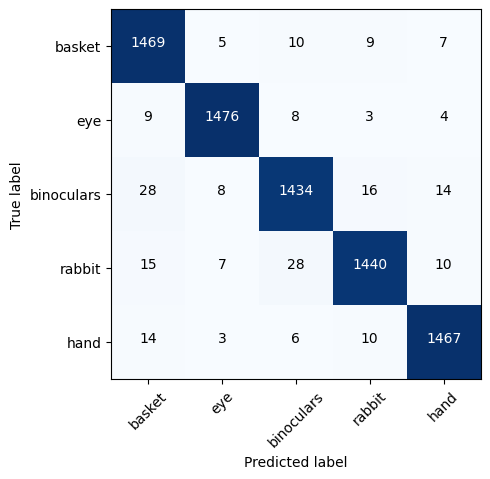

In [6]:
predictions = model.predict(X_test)
true_labels = np.argmax(y_test, axis=1)
confusion_mat = confusion_matrix(true_labels,np.argmax(predictions, axis=1))

plt.imshow(confusion_mat, cmap='Blues', interpolation='nearest')

# Ajouter des étiquettes sur les axes
class_names = ["basket","eye","binoculars","rabbit","hand"]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Ajouter des étiquettes sur les cellules
thresh = confusion_mat.max() / 2.
for i, j in itertools.product(range(confusion_mat.shape[0]), range(confusion_mat.shape[1])):
    plt.text(j, i, confusion_mat[i, j], horizontalalignment='center', color='white' if confusion_mat[i, j] > thresh else 'black')

# Ajouter des étiquettes sur les axes
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Afficher la figure
plt.show()


Dans cette partie de test, on propose une fonction globale qui prendra le nom du répertoir d'images à classer et le modèle de classification, elle fera le préprocessing nécessaire pour créer le jeu de test (X_test). Et elle fera le test de prédiction. Et à partir des prédictions, elle renvoie pour chaque image sa classe. La réponse totale sera enregistrée dans un fichier nommé "predictions.csv".

In [7]:
#-- Fonction principale de test
def predire_dir(model, directory, directory_destination=""):
    
    predictions = {"image_name":[],
                   "relative_path":[],
                   "class_label":[]
                  }
    
    for name in os.listdir(directory):
        im = Image.open(os.path.join(directory,name))
        X_test = np.asarray(im)
        X_test = np.expand_dims(X_test, axis=0)
        
        prediction = model.predict(X_test)
        predicted_class = np.argmax(prediction)
        print(predicted_class)
        predictions["image_name"].append(name)
        predictions["relative_path"].append(os.path.join(directory,name))
        predictions["class_label"].append(predicted_class)
        
    df_predictions = pd.DataFrame(predictions)
    
    df_predictions.to_csv(directory_destination+"predictions.csv")
    
    return(df_predictions)
        

In [1]:
# Exemple d'appel à la fonction : Remarque : On n'oublie pas le dernier '/' après le nom du dernier dossier dans le répertoir. Supprimez ce répertoire et mettez le votre.
#predire_dir(model,"data/images_test/")

# ----------------------------------- Fin Notebook de Test ---------------------------